In [99]:
import pandas as pd
import numpy as np
from matplotlib import rc
from matplotlib import pyplot as plt
import seaborn as sns
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings('ignore')

rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False

In [105]:
df = pd.read_csv('GP_통합(3years)_ver2_취업예측용.csv')

In [106]:
df.columns

Index(['연도', '본분교', '국공사립', '학위과정유형', '주야간', '전공계열', '전공_소분류_코드', '전공_세분류_코드',
       '학교유형', '학교소재지역', '성별', '연령', '혼인여부 및 배우자 학력', '아버지 학력', '어머니 학력',
       '부모님 소득', '부모님 자산', '가정의 경제적 지원', '대학 입학 구분', '진로 선택 및 취업준비 프로그램 참여 횟수',
       'GPA', '학자금대출 금액', '휴학 횟수', '석사/박사 재학여부', '목표 직업', '목표 직업 유형', '희망연봉',
       '근로소득', '근로시간', '적성 및 흥미', '전공 관련성', '업무 난이도', '업무량', '개인 발전 가능성',
       '직업 미래 전망', '고용 안정성', '근무환경', '복리후생', '회사 규모', '출퇴근 거리', '일자리의 사회적 평판',
       '업무의 사회적 평판', '구직기간', '일자리 지원 횟수', '면접 횟수', '합격 제의 횟수', '거절 이유',
       '구직 과정 어려운 점', '산업분류', '직업분류', '직원수', '사업체위치(시도)', '종사상 지위', '정규직여부',
       '인턴경험여부(현직장)', '근로소득(현재_월_만원)', '근로소득(초임_월_만원)', '구직기간(주)', '구직경로',
       '구직방법', '신입여부', '취업_중요요소_1순위', '취업_중요요소_2순위', '건강한정도', '운동시간(주)',
       '수면시간(일)', '흡연여부', '음주빈도', '재학중 일자리 경험', '일자리 횟수', '고용형태', '교육훈련횟수',
       '시간총합', '연수횟수', '토익', '토스등급', '오픽점수', '토플ibt', '탭스', '체류시간', '취업여부'],
      dtype='object')

In [107]:
df[['연도']].value_counts()

연도  
2016    18199
2018    18163
2017    18081
dtype: int64

---

# 데이터 분류

* df_A : 취업자 대상

In [108]:
df_A = df[['연도', '산업분류', '직업분류', '직원수', '사업체위치(시도)', '종사상 지위', '정규직여부',
       '인턴경험여부(현직장)', '근로소득(현재_월_만원)', '근로소득(초임_월_만원)', '구직기간(주)', '구직경로',
       '구직방법', '신입여부', '취업여부']]
df_A.head()

,연도,산업분류,직업분류,직원수,사업체위치(시도),종사상 지위,정규직여부,인턴경험여부(현직장),근로소득(현재_월_만원),근로소득(초임_월_만원),구직기간(주),구직경로,구직방법,신입여부,취업여부
0,2018,18,54,9,1,2,2,2,180,180,0,4,4,1,1
1,2018,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2018,16,21,1,5,5,0,0,30,30,0,7,4,4,1
3,2018,8,52,9,5,1,1,2,300,200,13,1,9,1,1
4,2018,7,61,0,8,1,1,2,112,112,0,6,9,1,1


* df_J : 대학 졸업 전 목표

In [109]:
df_J = df[['연도', '목표 직업', '목표 직업 유형', '희망연봉', '취업여부']]
df_J.head()

,연도,목표 직업,목표 직업 유형,희망연봉,취업여부
0,2018,0,0,2000,1
1,2018,0,0,2400,0
2,2018,0,0,2000,1
3,2018,0,0,3600,1
4,2018,0,0,2200,1


* df_B : 구직자 대상

In [110]:
df_B = df[['연도', '구직기간', '일자리 지원 횟수', '면접 횟수', '합격 제의 횟수', '거절 이유',
       '구직 과정 어려운 점', '취업여부' ]]
df_B

,연도,구직기간,일자리 지원 횟수,면접 횟수,합격 제의 횟수,거절 이유,구직 과정 어려운 점,취업여부
0,2018,0,0,0,0,0,0,1
1,2018,0,0,0,0,0,0,0
2,2018,0,0,0,0,0,0,1
3,2018,0,0,0,0,0,0,1
4,2018,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...
54438,2016,0,0,0,0,0,0,1
54439,2016,0,0,0,0,0,0,1
54440,2016,0,0,0,0,0,0,1
54441,2016,0,0,0,0,0,0,1


* df_K : 일자리 지원시 중요도

In [111]:
df_K = df[['연도', '근로소득', '근로시간', '적성 및 흥미', '전공 관련성', '업무 난이도', '업무량', '개인 발전 가능성',
       '직업 미래 전망', '고용 안정성', '근무환경', '복리후생', '회사 규모', '출퇴근 거리', '일자리의 사회적 평판',
       '업무의 사회적 평판', '취업여부']]
df_K

,연도,근로소득,근로시간,적성 및 흥미,전공 관련성,업무 난이도,업무량,개인 발전 가능성,직업 미래 전망,고용 안정성,근무환경,복리후생,회사 규모,출퇴근 거리,일자리의 사회적 평판,업무의 사회적 평판,취업여부
0,2018,5,5,5,2,4,4,5,5,5,5,5,3,4,3,3,1
1,2018,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,0
2,2018,5,4,5,5,4,3,5,2,4,5,5,3,5,4,4,1
3,2018,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,1
4,2018,4,5,4,4,4,3,4,4,4,3,4,2,3,4,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54438,2016,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,1
54439,2016,5,5,5,4,3,4,4,4,4,4,4,4,4,4,4,1
54440,2016,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,1
54441,2016,4,4,4,4,3,4,4,4,4,4,4,3,4,3,3,1


---

# 구직자 vs 취업자 응답 비교

In [112]:
df_J.columns, df_K.columns

(Index(['연도', '목표 직업', '목표 직업 유형', '희망연봉', '취업여부'], dtype='object'),
 Index(['연도', '근로소득', '근로시간', '적성 및 흥미', '전공 관련성', '업무 난이도', '업무량', '개인 발전 가능성',
        '직업 미래 전망', '고용 안정성', '근무환경', '복리후생', '회사 규모', '출퇴근 거리', '일자리의 사회적 평판',
        '업무의 사회적 평판', '취업여부'],
       dtype='object'))

## 목표 직업의 여부

In [113]:
ans = df_J[df_J['취업여부'] == 1]['목표 직업'].value_counts()[0]
no_ans = df_J[df_J['취업여부'] == 1]['목표 직업'].value_counts()[1:].sum()

print(f'취업자 중 목표 직업을 가지고 있는 경우 {ans}명 ({round(ans/(ans+no_ans)*100, 2)}%)')
print(f'취업자 중 목표 직업이 없는 경우 {no_ans}명 ({round(no_ans/(ans+no_ans)*100, 2)}%)')

취업자 중 목표 직업을 가지고 있는 경우 23982명 (60.42%)
취업자 중 목표 직업이 없는 경우 15709명 (39.58%)


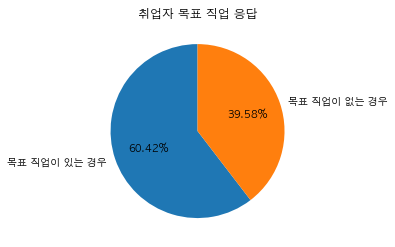

In [114]:
plt.pie([ans, no_ans], labels=['목표 직업이 있는 경우', '목표 직업이 없는 경우'], autopct='%.2f%%', startangle=90)
plt.title('취업자 목표 직업 응답')
plt.show()

In [115]:
ans = df_J[df_J['취업여부'] == 0]['목표 직업'].value_counts()[0]
no_ans = df_J[df_J['취업여부'] == 0]['목표 직업'].value_counts()[1:].sum()

print(f'구직자 중 목표 직업을 가지고 있는 경우 {ans}명 ({round(ans/(ans+no_ans)*100, 2)}%)')
print(f'구직자 중 목표 직업이 없는 경우 {no_ans}명 ({round(no_ans/(ans+no_ans)*100, 2)}%)')

구직자 중 목표 직업을 가지고 있는 경우 8549명 (57.95%)
구직자 중 목표 직업이 없는 경우 6203명 (42.05%)


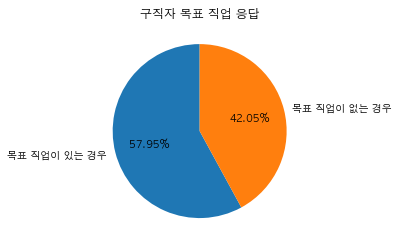

In [116]:
plt.pie([ans, no_ans], labels=['목표 직업이 있는 경우', '목표 직업이 없는 경우'], autopct='%.2f%%', startangle=90)
plt.title('구직자 목표 직업 응답')
plt.show()

In [117]:
df_J_2016 = df_J[df_J['연도'] == 2016]

ans = df_J_2016[df_J_2016['취업여부'] == 1]['목표 직업'].value_counts()[0]
no_ans = df_J_2016[df_J_2016['취업여부'] == 1]['목표 직업'].value_counts()[1:].sum()

print(f'취업자 중 목표 직업을 가지고 있는 경우 {ans}명 ({round(ans/(ans+no_ans)*100, 2)}%)')
print(f'취업자 중 목표 직업이 없는 경우 {no_ans}명 ({round(no_ans/(ans+no_ans)*100, 2)}%)')

print()

ans = df_J_2016[df_J_2016['취업여부'] == 0]['목표 직업'].value_counts()[0]
no_ans = df_J_2016[df_J_2016['취업여부'] == 0]['목표 직업'].value_counts()[1:].sum()

print(f'구직자 중 목표 직업을 가지고 있는 경우 {ans}명 ({round(ans/(ans+no_ans)*100, 2)}%)')
print(f'구직자 중 목표 직업이 없는 경우 {no_ans}명 ({round(no_ans/(ans+no_ans)*100, 2)}%)')

취업자 중 목표 직업을 가지고 있는 경우 7704명 (57.66%)
취업자 중 목표 직업이 없는 경우 5656명 (42.34%)

구직자 중 목표 직업을 가지고 있는 경우 2755명 (56.93%)
구직자 중 목표 직업이 없는 경우 2084명 (43.07%)


In [118]:
df_J_2017 = df_J[df_J['연도'] == 2017]

ans = df_J_2017[df_J_2017['취업여부'] == 1]['목표 직업'].value_counts()[0]
no_ans = df_J_2017[df_J_2017['취업여부'] == 1]['목표 직업'].value_counts()[1:].sum()

print(f'취업자 중 목표 직업을 가지고 있는 경우 {ans}명 ({round(ans/(ans+no_ans)*100, 2)}%)')
print(f'취업자 중 목표 직업이 없는 경우 {no_ans}명 ({round(no_ans/(ans+no_ans)*100, 2)}%)')

print()

ans = df_J_2017[df_J_2017['취업여부'] == 0]['목표 직업'].value_counts()[0]
no_ans = df_J_2017[df_J_2017['취업여부'] == 0]['목표 직업'].value_counts()[1:].sum()

print(f'구직자 중 목표 직업을 가지고 있는 경우 {ans}명 ({round(ans/(ans+no_ans)*100, 2)}%)')
print(f'구직자 중 목표 직업이 없는 경우 {no_ans}명 ({round(no_ans/(ans+no_ans)*100, 2)}%)')

취업자 중 목표 직업을 가지고 있는 경우 7637명 (58.58%)
취업자 중 목표 직업이 없는 경우 5399명 (41.42%)

구직자 중 목표 직업을 가지고 있는 경우 2795명 (55.4%)
구직자 중 목표 직업이 없는 경우 2250명 (44.6%)


In [119]:
df_J_2018 = df_J[df_J['연도'] == 2018]

ans = df_J_2018[df_J_2018['취업여부'] == 1]['목표 직업'].value_counts()[0]
no_ans = df_J_2018[df_J_2018['취업여부'] == 1]['목표 직업'].value_counts()[1:].sum()

print(f'취업자 중 목표 직업을 가지고 있는 경우 {ans}명 ({round(ans/(ans+no_ans)*100, 2)}%)')
print(f'취업자 중 목표 직업이 없는 경우 {no_ans}명 ({round(no_ans/(ans+no_ans)*100, 2)}%)')

print()

ans = df_J_2018[df_J_2018['취업여부'] == 0]['목표 직업'].value_counts()[0]
no_ans = df_J_2018[df_J_2018['취업여부'] == 0]['목표 직업'].value_counts()[1:].sum()

print(f'구직자 중 목표 직업을 가지고 있는 경우 {ans}명 ({round(ans/(ans+no_ans)*100, 2)}%)')
print(f'구직자 중 목표 직업이 없는 경우 {no_ans}명 ({round(no_ans/(ans+no_ans)*100, 2)}%)')

취업자 중 목표 직업을 가지고 있는 경우 8641명 (64.99%)
취업자 중 목표 직업이 없는 경우 4654명 (35.01%)

구직자 중 목표 직업을 가지고 있는 경우 2999명 (61.61%)
구직자 중 목표 직업이 없는 경우 1869명 (38.39%)


## 구직자와 취업자의 희망연봉

In [120]:
def outlier_cut(data):
    IQR = data.quantile(0.75) - data.quantile(0.25)
    upper = data.quantile(0.75)+(IQR*1.5)
    lower = data.quantile(0.25)-(IQR*1.5)
    return upper, lower

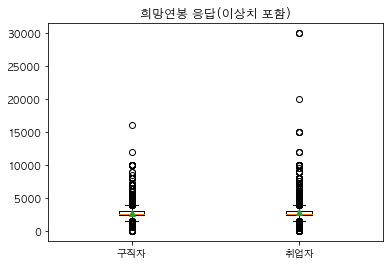

In [121]:
fig, ax = plt.subplots()

plt.title('희망연봉 응답(이상치 포함)')
ax.boxplot([df_J[df_J['취업여부'] == 0]['희망연봉'], df_J[df_J['취업여부'] == 1]['희망연봉']], showmeans=True)

plt.xticks([1, 2], ['구직자', '취업자'])

plt.show()

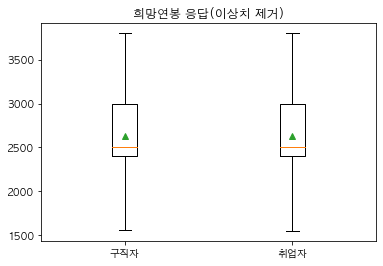

In [122]:
data0 = df_J[df_J['취업여부'] == 0]['희망연봉']
upper0, lower0 = outlier_cut(data0)
data_0 = data0[(data0 < upper0) & (data0 > lower0)]

data1 = df_J[df_J['취업여부'] == 1]['희망연봉']
upper1, lower1 = outlier_cut(data1)
data_1 = data1[(data1 < upper1) & (data1 > lower1)]

fig, ax = plt.subplots()

plt.title('희망연봉 응답(이상치 제거)')
ax.boxplot([data_0, data_1], showmeans=True)

plt.xticks([1, 2], ['구직자', '취업자'])

plt.show()

In [123]:
df_J['희망연봉'].describe()

count    54443.000000
mean      2807.314917
std        864.257546
min          0.000000
25%       2400.000000
50%       2600.000000
75%       3000.000000
max      30000.000000
Name: 희망연봉, dtype: float64

In [124]:
J_describe = df_J.groupby('취업여부')['희망연봉'].agg([['평균', 'mean'], ['중간값', 'median'], ['최소', 'min'], ['최대', 'max']])
J_describe.index = ['구직자', '취업자']
J_describe

,평균,중간값,최소,최대
구직자,2783.106630,2600.0,0,16000
취업자,2816.312439,2600.0,0,30000


In [125]:
# 일자리 지원시에 중요하게 생각하는 정도
k_cols = df_K.columns
k_cols

Index(['연도', '근로소득', '근로시간', '적성 및 흥미', '전공 관련성', '업무 난이도', '업무량', '개인 발전 가능성',
       '직업 미래 전망', '고용 안정성', '근무환경', '복리후생', '회사 규모', '출퇴근 거리', '일자리의 사회적 평판',
       '업무의 사회적 평판', '취업여부'],
      dtype='object')

In [126]:
# 상대적인 선호도 파악을 위해서 전체 응답의 평균 열 추가
df_K['중요도_평균'] = df_K.iloc[:,1:-1].mean(axis=1).round(2)

In [127]:
df_K_new = pd.DataFrame()

In [128]:
# 각 답변자의 응답 평균을 나눠 상대적으로 중요하게 생각하는 요소(정도) 알아내기
for col in k_cols[:-1]:
    df_K_new[col] = round(df_K[col] / df_K['중요도_평균'],3)

In [129]:
df_K_new['연도'] = df_K['연도']
df_K_new['취업여부'] = df_K['취업여부']

In [130]:
df_K_new

,연도,근로소득,근로시간,적성 및 흥미,전공 관련성,업무 난이도,업무량,개인 발전 가능성,직업 미래 전망,고용 안정성,근무환경,복리후생,회사 규모,출퇴근 거리,일자리의 사회적 평판,업무의 사회적 평판,취업여부
0,2018,1.190,1.190,1.190,0.476,0.952,0.952,1.190,1.190,1.190,1.190,1.190,0.714,0.952,0.714,0.714,1
1,2018,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0
2,2018,1.190,0.952,1.190,1.190,0.952,0.714,1.190,0.476,0.952,1.190,1.190,0.714,1.190,0.952,0.952,1
3,2018,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1
4,2018,1.072,1.340,1.072,1.072,1.072,0.804,1.072,1.072,1.072,0.804,1.072,0.536,0.804,1.072,1.072,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54438,2016,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1
54439,2016,1.211,1.211,1.211,0.969,0.726,0.969,0.969,0.969,0.969,0.969,0.969,0.969,0.969,0.969,0.969,1
54440,2016,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1
54441,2016,1.072,1.072,1.072,1.072,0.804,1.072,1.072,1.072,1.072,1.072,1.072,0.804,1.072,0.804,0.804,1


In [131]:
df_K_emp = df_K_new[df_K_new['취업여부']==1].drop('취업여부', axis=1)
df_K_seek = df_K_new[df_K_new['취업여부']==0].drop('취업여부', axis=1)

In [132]:
# 취업자들이 구직시 중요하게 생각하는 요소(내림차순)
emp_import_list = df_K_emp.mean().sort_values()[:-1]
emp_import_list[::-1]

근로소득           1.107370
근로시간           1.096355
적성 및 흥미        1.095089
고용 안정성         1.080544
개인 발전 가능성      1.068851
직업 미래 전망       1.068020
근무환경           1.062218
복리후생           1.042860
업무량            0.984885
출퇴근 거리         0.950070
전공 관련성         0.916393
업무 난이도         0.914467
업무의 사회적 평판     0.890958
일자리의 사회적 평판    0.890530
회사 규모          0.831787
dtype: float64

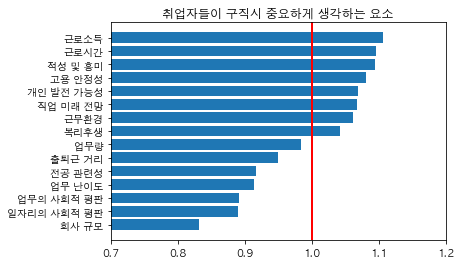

In [133]:
plt.title('취업자들이 구직시 중요하게 생각하는 요소')
plt.barh(emp_import_list.index, emp_import_list.values)
plt.xlim([0.7, 1.2])
plt.axvspan(0.999,1.002, facecolor='red')
plt.show()

In [134]:
# 구직자들이 구직시 중요하게 생각하는 요소(내림차순)
seek_import_list = df_K_seek.mean().sort_values()[:-1]
seek_import_list[::-1]

고용 안정성         1.101869
적성 및 흥미        1.100008
근로시간           1.099184
근로소득           1.099024
근무환경           1.084054
직업 미래 전망       1.071570
개인 발전 가능성      1.068453
복리후생           1.053595
업무량            0.970950
출퇴근 거리         0.944380
전공 관련성         0.922200
업무 난이도         0.904890
업무의 사회적 평판     0.884414
일자리의 사회적 평판    0.883535
회사 규모          0.812187
dtype: float64

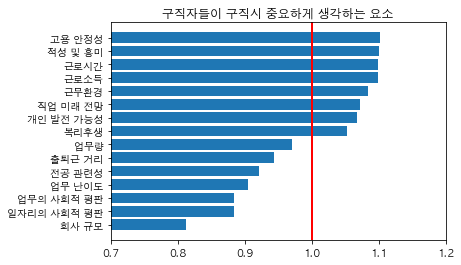

In [135]:
plt.title('구직자들이 구직시 중요하게 생각하는 요소')
plt.barh(seek_import_list.index, seek_import_list.values)
plt.xlim([0.7, 1.2])
plt.axvspan(0.999,1.002, facecolor='red')
plt.show()

In [136]:
df_K_emp_2016 = df_K_new[(df_K_new['연도'] == 2016) & (df_K_new['취업여부']==1)].drop('취업여부', axis=1)
df_K_seek_2016 = df_K_new[(df_K_new['연도'] == 2016) & (df_K_new['취업여부']==0)].drop('취업여부', axis=1)
df_K_emp_2017 = df_K_new[(df_K_new['연도'] == 2017) & (df_K_new['취업여부']==1)].drop('취업여부', axis=1)
df_K_seek_2017 = df_K_new[(df_K_new['연도'] == 2017) & (df_K_new['취업여부']==0)].drop('취업여부', axis=1)
df_K_emp_2018 = df_K_new[(df_K_new['연도'] == 2018) & (df_K_new['취업여부']==1)].drop('취업여부', axis=1)
df_K_seek_2018 = df_K_new[(df_K_new['연도'] == 2018) & (df_K_new['취업여부']==0)].drop('취업여부', axis=1)

In [137]:
import_df_emp = pd.DataFrame()

In [138]:
emp_import_list = df_K_emp_2016.mean().sort_values()[:-1]
import_df_emp['2016_list'] = emp_import_list[::-1].index
import_df_emp['2016_value'] = emp_import_list[::-1].values

In [139]:
emp_import_list = df_K_emp_2017.mean().sort_values()[:-1]
import_df_emp['2017_list'] = emp_import_list[::-1].index
import_df_emp['2017_value'] = emp_import_list[::-1].values

In [140]:
emp_import_list = df_K_emp_2018.mean().sort_values()[:-1]
import_df_emp['2018_list'] = emp_import_list[::-1].index
import_df_emp['2018_value'] = emp_import_list[::-1].values

In [141]:
# 3개년 동안의 취업자가 일자리를 구할 때 중요하게 생각하는 요소
import_df_emp

,2016_list,2016_value,2017_list,2017_value,2018_list,2018_value
0,근로소득,1.113627,근로소득,1.106988,근로소득,1.101458
1,근로시간,1.102856,근로시간,1.098751,적성 및 흥미,1.091387
2,적성 및 흥미,1.101211,적성 및 흥미,1.092592,근로시간,1.087473
3,고용 안정성,1.086152,고용 안정성,1.078845,고용 안정성,1.076576
4,직업 미래 전망,1.073691,개인 발전 가능성,1.068689,개인 발전 가능성,1.065001
5,개인 발전 가능성,1.072840,직업 미래 전망,1.067084,직업 미래 전망,1.063241
6,근무환경,1.063670,근무환경,1.064142,근무환경,1.058871
7,복리후생,1.046967,복리후생,1.045100,복리후생,1.036535
8,업무량,0.986519,업무량,0.986679,업무량,0.981484
9,출퇴근 거리,0.945718,출퇴근 거리,0.949296,출퇴근 거리,0.955204


In [142]:
import_df_seek = pd.DataFrame()

In [143]:
seek_import_list = df_K_seek_2016.mean().sort_values()[:-1]
import_df_seek['2016_list'] = seek_import_list[::-1].index
import_df_seek['2016_value'] = seek_import_list[::-1].values

In [144]:
seek_import_list = df_K_seek_2017.mean().sort_values()[:-1]
import_df_seek['2017_list'] = seek_import_list[::-1].index
import_df_seek['2017_value'] = seek_import_list[::-1].values

In [145]:
seek_import_list = df_K_seek_2018.mean().sort_values()[:-1]
import_df_seek['2018_list'] = seek_import_list[::-1].index
import_df_seek['2018_value'] = seek_import_list[::-1].values

In [146]:
# 3개년 동안의 구직자가 일자리를 구할 때 중요하게 생각하는 요소
import_df_seek

,2016_list,2016_value,2017_list,2017_value,2018_list,2018_value
0,근로시간,1.107770,고용 안정성,1.104578,적성 및 흥미,1.098862
1,고용 안정성,1.103702,근로시간,1.104123,고용 안정성,1.097240
2,적성 및 흥미,1.102528,근로소득,1.104019,근로소득,1.092010
3,근로소득,1.100874,적성 및 흥미,1.098698,근로시간,1.085530
4,근무환경,1.082172,근무환경,1.089247,근무환경,1.080544
5,직업 미래 전망,1.073424,직업 미래 전망,1.073152,직업 미래 전망,1.068089
6,개인 발전 가능성,1.071855,개인 발전 가능성,1.066850,개인 발전 가능성,1.066731
7,복리후생,1.054778,복리후생,1.060045,복리후생,1.045736
8,업무량,0.977596,업무량,0.972455,업무량,0.962784
9,출퇴근 거리,0.933304,출퇴근 거리,0.946798,출퇴근 거리,0.952884


---

# 취업자 응답자 구성

## 전체 취업자 직장 분류

In [147]:
employ_df = df[df['취업여부'] == 1]
job_category = employ_df['직업분류'].value_counts().sort_index()

In [148]:
# 한국표준직업분류
job_category.index = ['모름/무응답','관리직(임원·부서장)','경영·행정·사무직','금융·보험직','인문·사회과학 연구직','자연·생명과학 연구직','정보통신 연구개발직 및 공학기술직','건설·채굴 연구개발직 및 공학기술직','제조 연구개발직 및 공학기술직','교육직','법률직','사회복지·종교직','경찰·소방·교도직','군인','보건·의료직','예술·디자인·방송직','스포츠·레크리에이션직','미용·예식 서비스직','여행·숙박·오락 서비스직','음식 서비스직','경호·경비직','돌봄 서비스직(간병·육아)','청소 및 기타 개인서비스직','영업·판매직','운전·운송직','건설·채굴직','기계 설치·정비·생산직','금속·재료 설치·정비·생산직(판금·단조·주조·용접·도장 등)','전기·전자 설치·정비·생산직','정보통신 설치·정비직','화학·환경 설치·정비·생산직','섬유·의복 생산직','식품 가공·생산직','인쇄·목재·공예 및 기타 설치·정비·생산직','제조 단순직','농림어업직']
job = job_category.sort_values()
job

섬유·의복 생산직                               33
모름/무응답                                  36
관리직(임원·부서장)                             50
제조 단순직                                  53
인문·사회과학 연구직                             70
돌봄 서비스직(간병·육아)                          73
정보통신 설치·정비직                             87
금속·재료 설치·정비·생산직(판금·단조·주조·용접·도장 등)      106
인쇄·목재·공예 및 기타 설치·정비·생산직                122
청소 및 기타 개인서비스직                         127
식품 가공·생산직                              131
법률직                                    144
경호·경비직                                 165
미용·예식 서비스직                             179
건설·채굴직                                 197
경찰·소방·교도직                              207
농림어업직                                  250
화학·환경 설치·정비·생산직                        252
여행·숙박·오락 서비스직                          370
스포츠·레크리에이션직                            396
운전·운송직                                 407
군인                                     719
전기·전자 설치·정비·생산직                        746
기계 설치·정비·생산

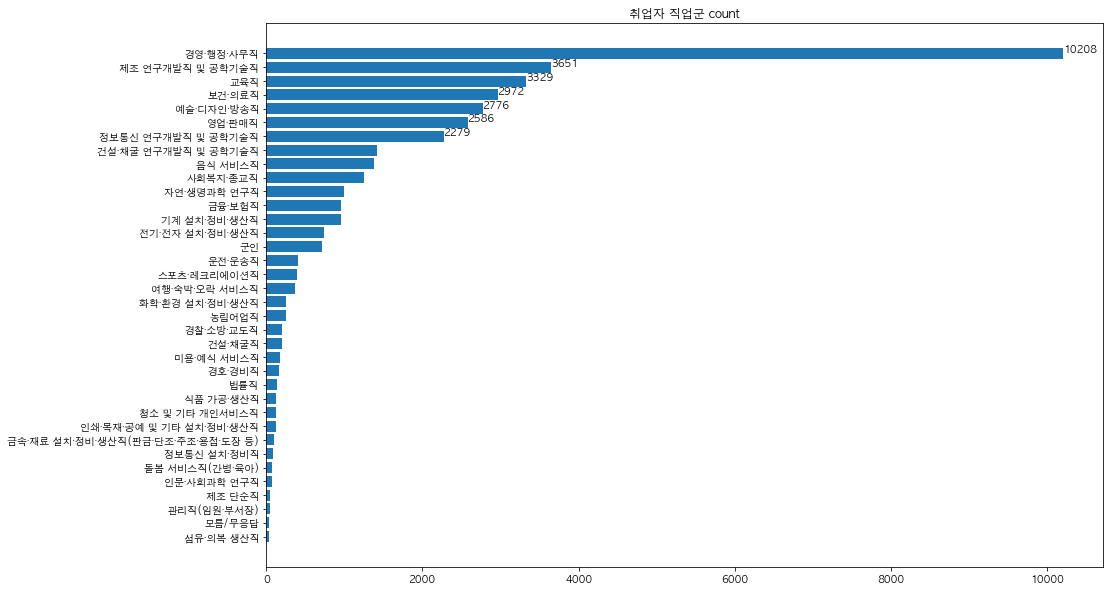

In [149]:
plt.figure(figsize=(15,10))
plt.barh(job.index, job)

for i in range(1,8):
    plt.text(job[-i],job.index[-i], job[-i], verticalalignment='baseline', horizontalalignment='left')

plt.title('취업자 직업군 count')
plt.show()

In [150]:
employ_df_2016 = df[(df['취업여부'] == 1) & (df['연도']==2016)]
job_category = employ_df_2016['직업분류'].value_counts().sort_index()

# 한국표준직업분류
job_category.index = ['모름/무응답','관리직(임원·부서장)','경영·행정·사무직','금융·보험직','인문·사회과학 연구직','자연·생명과학 연구직','정보통신 연구개발직 및 공학기술직','건설·채굴 연구개발직 및 공학기술직','제조 연구개발직 및 공학기술직','교육직','법률직','사회복지·종교직','경찰·소방·교도직','군인','보건·의료직','예술·디자인·방송직','스포츠·레크리에이션직','미용·예식 서비스직','여행·숙박·오락 서비스직','음식 서비스직','경호·경비직','돌봄 서비스직(간병·육아)','청소 및 기타 개인서비스직','영업·판매직','운전·운송직','건설·채굴직','기계 설치·정비·생산직','금속·재료 설치·정비·생산직(판금·단조·주조·용접·도장 등)','전기·전자 설치·정비·생산직','정보통신 설치·정비직','화학·환경 설치·정비·생산직','섬유·의복 생산직','식품 가공·생산직','인쇄·목재·공예 및 기타 설치·정비·생산직','제조 단순직','농림어업직']
job = job_category.sort_values()

In [151]:
job_df = pd.DataFrame()

employ_df_2016 = df[(df['취업여부'] == 1) & (df['연도']==2016)]
employ_df_2017 = df[(df['취업여부'] == 1) & (df['연도']==2017)]
employ_df_2018 = df[(df['취업여부'] == 1) & (df['연도']==2018)]

job_category_2016 = employ_df_2016['직업분류'].value_counts().sort_index()
job_category_2016.index = ['모름/무응답','관리직(임원·부서장)','경영·행정·사무직','금융·보험직','인문·사회과학 연구직','자연·생명과학 연구직','정보통신 연구개발직 및 공학기술직','건설·채굴 연구개발직 및 공학기술직','제조 연구개발직 및 공학기술직','교육직','법률직','사회복지·종교직','경찰·소방·교도직','군인','보건·의료직','예술·디자인·방송직','스포츠·레크리에이션직','미용·예식 서비스직','여행·숙박·오락 서비스직','음식 서비스직','경호·경비직','돌봄 서비스직(간병·육아)','청소 및 기타 개인서비스직','영업·판매직','운전·운송직','건설·채굴직','기계 설치·정비·생산직','금속·재료 설치·정비·생산직(판금·단조·주조·용접·도장 등)','전기·전자 설치·정비·생산직','정보통신 설치·정비직','화학·환경 설치·정비·생산직','섬유·의복 생산직','식품 가공·생산직','인쇄·목재·공예 및 기타 설치·정비·생산직','제조 단순직','농림어업직']
job_list = job_category_2016.sort_values(ascending=False)
job_df['2016_list'] = job_list.index
job_df['2016_value'] = job_list.values

job_category_2017 = employ_df_2017['직업분류'].value_counts().sort_index()
job_category_2017.index = ['모름/무응답','관리직(임원·부서장)','경영·행정·사무직','금융·보험직','인문·사회과학 연구직','자연·생명과학 연구직','정보통신 연구개발직 및 공학기술직','건설·채굴 연구개발직 및 공학기술직','제조 연구개발직 및 공학기술직','교육직','법률직','사회복지·종교직','경찰·소방·교도직','군인','보건·의료직','예술·디자인·방송직','스포츠·레크리에이션직','미용·예식 서비스직','여행·숙박·오락 서비스직','음식 서비스직','경호·경비직','돌봄 서비스직(간병·육아)','청소 및 기타 개인서비스직','영업·판매직','운전·운송직','건설·채굴직','기계 설치·정비·생산직','금속·재료 설치·정비·생산직(판금·단조·주조·용접·도장 등)','전기·전자 설치·정비·생산직','정보통신 설치·정비직','화학·환경 설치·정비·생산직','섬유·의복 생산직','식품 가공·생산직','인쇄·목재·공예 및 기타 설치·정비·생산직','제조 단순직','농림어업직']
job_list = job_category_2017.sort_values(ascending=False)
job_df['2017_list'] = job_list.index
job_df['2017_value'] = job_list.values

job_category_2018 = employ_df_2018['직업분류'].value_counts().sort_index()
job_category_2018.index = ['모름/무응답','관리직(임원·부서장)','경영·행정·사무직','금융·보험직','인문·사회과학 연구직','자연·생명과학 연구직','정보통신 연구개발직 및 공학기술직','건설·채굴 연구개발직 및 공학기술직','제조 연구개발직 및 공학기술직','교육직','법률직','사회복지·종교직','경찰·소방·교도직','군인','보건·의료직','예술·디자인·방송직','스포츠·레크리에이션직','미용·예식 서비스직','여행·숙박·오락 서비스직','음식 서비스직','경호·경비직','돌봄 서비스직(간병·육아)','청소 및 기타 개인서비스직','영업·판매직','운전·운송직','건설·채굴직','기계 설치·정비·생산직','금속·재료 설치·정비·생산직(판금·단조·주조·용접·도장 등)','전기·전자 설치·정비·생산직','정보통신 설치·정비직','화학·환경 설치·정비·생산직','섬유·의복 생산직','식품 가공·생산직','인쇄·목재·공예 및 기타 설치·정비·생산직','제조 단순직','농림어업직']
job_list = job_category_2018.sort_values(ascending=False)
job_df['2018_list'] = job_list.index
job_df['2018_value'] = job_list.values

In [152]:
job_df

,2016_list,2016_value,2017_list,2017_value,2018_list,2018_value
0,경영·행정·사무직,3402,경영·행정·사무직,3379,경영·행정·사무직,3427
1,제조 연구개발직 및 공학기술직,1245,제조 연구개발직 및 공학기술직,1175,제조 연구개발직 및 공학기술직,1231
2,교육직,1101,교육직,1154,교육직,1074
3,보건·의료직,1077,보건·의료직,1000,예술·디자인·방송직,973
4,영업·판매직,919,예술·디자인·방송직,887,보건·의료직,895
5,예술·디자인·방송직,916,영업·판매직,836,정보통신 연구개발직 및 공학기술직,831
6,정보통신 연구개발직 및 공학기술직,710,정보통신 연구개발직 및 공학기술직,738,영업·판매직,831
7,사회복지·종교직,463,건설·채굴 연구개발직 및 공학기술직,490,음식 서비스직,498
8,건설·채굴 연구개발직 및 공학기술직,458,음식 서비스직,434,건설·채굴 연구개발직 및 공학기술직,476
9,음식 서비스직,448,사회복지·종교직,434,자연·생명과학 연구직,393


## 직장 분류에 따른 근로소득

In [153]:
# 직업분류에 모름/무응답(인데 급여는 작성해놓은 경우)은 제외
employ_df = employ_df[(employ_df['직업분류'] != 0) | (employ_df['근로소득(현재_월_만원)'] == 0)]

<AxesSubplot:xlabel='근로소득(현재_월_만원)'>

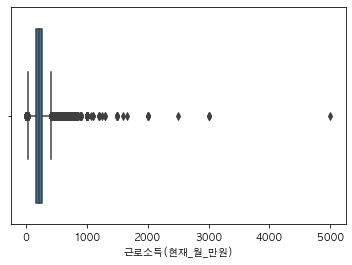

In [154]:
sns.boxplot(employ_df['근로소득(현재_월_만원)']) 

In [155]:
iqr = employ_df['근로소득(현재_월_만원)'].quantile(0.75) - employ_df['근로소득(현재_월_만원)'].quantile(0.25)

max = employ_df['근로소득(현재_월_만원)'].quantile(0.75)+(1.5*iqr)
min = employ_df['근로소득(현재_월_만원)'].quantile(0.25)-(1.5*iqr)

In [156]:
# 이상치 (과다)
employ_df[employ_df['근로소득(현재_월_만원)'] > max].shape

(1508, 81)

In [157]:
# 이상치 (과소)
employ_df[employ_df['근로소득(현재_월_만원)'] <= min].shape

(437, 81)

In [158]:
job_category_describe = employ_df.groupby('직업분류')['근로소득(현재_월_만원)'].agg([['평균', 'mean'], ['중간값', 'median'], ['최소', 'min'], ['최대', 'max']])
job_category_describe.index = ['모름/무응답','관리직(임원·부서장)','경영·행정·사무직','금융·보험직','인문·사회과학 연구직','자연·생명과학 연구직','정보통신 연구개발직 및 공학기술직','건설·채굴 연구개발직 및 공학기술직','제조 연구개발직 및 공학기술직','교육직','법률직','사회복지·종교직','경찰·소방·교도직','군인','보건·의료직','예술·디자인·방송직','스포츠·레크리에이션직','미용·예식 서비스직','여행·숙박·오락 서비스직','음식 서비스직','경호·경비직','돌봄 서비스직(간병·육아)','청소 및 기타 개인서비스직','영업·판매직','운전·운송직','건설·채굴직','기계 설치·정비·생산직','금속·재료 설치·정비·생산직(판금·단조·주조·용접·도장 등)','전기·전자 설치·정비·생산직','정보통신 설치·정비직','화학·환경 설치·정비·생산직','섬유·의복 생산직','식품 가공·생산직','인쇄·목재·공예 및 기타 설치·정비·생산직','제조 단순직','농림어업직']
job_category_describe

,평균,중간값,최소,최대
모름/무응답,0.000000,0.0,0,0
관리직(임원·부서장),552.720000,445.0,180,2500
경영·행정·사무직,227.473452,210.0,0,3000
금융·보험직,313.894462,300.0,0,1200
인문·사회과학 연구직,211.685714,200.0,0,500
자연·생명과학 연구직,160.502498,150.0,10,500
정보통신 연구개발직 및 공학기술직,246.089513,230.0,0,750
건설·채굴 연구개발직 및 공학기술직,240.516152,230.0,0,1500
제조 연구개발직 및 공학기술직,243.409477,240.0,0,833
교육직,183.857014,200.0,0,1500


In [159]:
employ_df.groupby(['연도','직업분류'])['근로소득(현재_월_만원)'].agg([['평균', 'mean'], ['중간값', 'median'], ['최소', 'min'], ['최대', 'max']])

평균    중간값   최소    최대
연도   직업분류                              
2016 1     537.272727  500.0  200  1000
     2     216.157554  200.0    0  1000
     3     293.353125  270.0   50   750
     11    194.857143  180.0  150   280
     12    155.383803  150.0   30   410
...               ...    ...  ...   ...
2018 86    189.444444  200.0   70   300
     87    226.718750  208.0  100   500
     88    248.340426  190.0   10  2000
     89    129.066667  148.0    0   280
     90    307.835294  215.0    0  1000

[106 rows x 4 columns]

### df_A

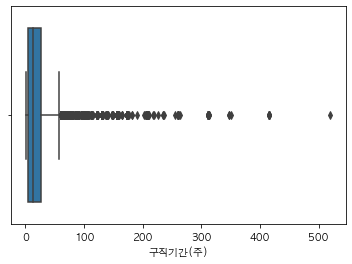

In [160]:
sns.boxplot(df_A[df_A['구직기간(주)'] != 0]['구직기간(주)'])
plt.show()

In [161]:
df_A[df_A['구직기간(주)'] != 0]['구직기간(주)'].describe()

count    23105.000000
mean        23.101060
std         32.411659
min          1.000000
25%          4.000000
50%         13.000000
75%         26.000000
max        520.000000
Name: 구직기간(주), dtype: float64

In [162]:
IQR = df_A[df_A['구직기간(주)'] != 0]['구직기간(주)'].quantile(0.75)-df_A[df_A['구직기간(주)'] != 0]['구직기간(주)'].quantile(0.25)
upper, lower = outlier_cut(df_A[df_A['구직기간(주)'] != 0]['구직기간(주)'])

In [163]:
df_A[(df_A['구직기간(주)'] != 0) & (df_A['구직기간(주)'] > upper)]

,연도,산업분류,직업분류,직원수,사업체위치(시도),종사상 지위,정규직여부,인턴경험여부(현직장),근로소득(현재_월_만원),근로소득(초임_월_만원),구직기간(주),구직경로,구직방법,신입여부,취업여부
223,2018,15,25,9,14,1,1,2,160,120,78,6,9,1,1
687,2018,16,21,0,8,1,1,2,260,260,82,10,0,3,1
699,2018,16,21,9,8,1,1,2,250,250,65,10,0,1,1
736,2018,6,70,6,10,1,1,2,350,300,263,4,4,3,1
772,2018,3,2,9,1,1,1,2,300,300,61,1,9,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54302,2016,16,21,4,14,1,2,2,50,50,106,4,4,1,1
54341,2016,18,41,6,9,1,1,2,150,150,104,1,2,3,1
54346,2016,16,2,7,1,1,1,2,170,170,122,3,4,1,1
54387,2016,7,2,1,1,1,1,2,250,200,104,6,9,1,1


이상치 제거 : 구직기간(주)

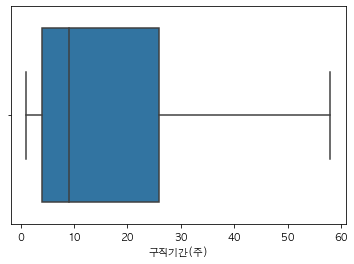

In [164]:
sns.boxplot(df_A[(df_A['구직기간(주)'] != 0) & (df_A['구직기간(주)'] < upper)]['구직기간(주)'])
plt.show()